# Package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Lecture de données

In [3]:
#lecture du fichier

base =  pd.read_csv("C:/Users/Cyrie/OneDrive/Bureau/M2_DS/S1/MLOPS/Rendu_MLOPS/athlete_events.csv")  
#base = pd.read_csv("/Users/lepercqlouise/stockage_macBook/Rendu_MLOPS/athlete_events.csv")
#base = pd.read_csv("//ad.univ-lille.fr/Etudiants/Homedir3/147794/Documents/M2/Rendu_MLOPS/athlete_events.csv")


# Filtre sur Summer

In [4]:
#filtre sur Summer
base_summer = base[base['Season'] == 'Summer']

#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes1 = base_summer.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes1)

Nombre de lignes : 222552


# Valeurs manquantes et abbérantes du df base_summer

In [ ]:
#valeurs manquantes pour le df base summer
valeurs_manquantes_par_variable1 = base_summer.isnull().sum()

# Affichage du résultat pour le df base summer
print(valeurs_manquantes_par_variable1)

In [ ]:
#valeur abbérentes
# Création de la figure et des axes
plt.figure(figsize=(8, 6))

###################AGE#####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Age'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable age selon la médaille')
plt.xlabel('Médaille')
plt.show()

###################Height####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Height'], color='#008080')

# Titres et labels
plt.title('Boîte à moustaches de la variable taille selon la médaille')
plt.xlabel('Médaille')
plt.show()


###################Weight####################
# Création de la boîte à moustaches 
sns.boxplot(x=base_summer['Medal'], y=base_summer['Weight'], color='#008030')

# Titres et labels
plt.title('Boîte à moustaches de la variable poids selon la médaille')
plt.xlabel('Médaille')
plt.show()




In [ ]:
#lecture des valeurs abbérantes
# Filtre sur les enregistrements où l'âge est supérieur à 40 et inférieur à 11 ans
base_summer_age_11_40 = base_summer[(base_summer['Age'] > 40) | (base_summer['Age'] < 11)]
print("DataFrame pour l'âge entre 11 et 40 ans inclus:")
print(base_summer_age_11_40)

# Filtre sur les enregistrements où la taille est inférieure à 145 cm et supérieure à 210 cm
base_summer_height_145_210 = base_summer[(base_summer['Height'] > 210) | (base_summer['Height'] < 145)]
print("\nDataFrame pour la taille entre 145 et 210 cm inclus:")
print(base_summer_height_145_210)

# Filtre sur les enregistrements où le poids est inférieur à 35 kg et supérieur à 118 kg
base_summer_weight_35_118 = base_summer[(base_summer['Weight'] > 118) | (base_summer['Weight'] < 35)]
print("\nDataFrame pour le poids entre 35 et 118 kg inclus:")
print(base_summer_weight_35_118)


# Regroupements

In [ ]:
#voir la répartiton des variables quantitatives avant le regroupement
###################YEAR####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Year'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Year'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable année ')
plt.xlabel('Année')
plt.ylabel('Densité')
plt.show()

###################AGE#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Age'], bins=30, kde=True, color='#008080', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Age'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable age ')
plt.xlabel('Age')
plt.ylabel('Densité')
plt.show()

###################HEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Height'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Height'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable taille ')
plt.xlabel('Taille')
plt.ylabel('Densité')
plt.show()

###################WEIGHT#####################
plt.figure(figsize=(8, 6))
sns.histplot(base_summer['Weight'], bins=30, kde=True, color='#008030', stat='density', element='bars', common_norm=False)  # Utilisation du code hexadécimal pour un bleu canard foncé
sns.kdeplot(base_summer['Weight'], color='red', linewidth=2)  # Courbe KDE en rouge
plt.title('Répartition de la variable poids ')
plt.xlabel('Poids')
plt.ylabel('Densité')
plt.show()

In [ ]:
#faire les regrouepements sur les variables quantitatives
###################AGE#####################
#intervalles d'age
intervalles = [0, 21, 25, 33, float('inf')]
labels = ['< 21 ans', '21 - 24 ans', '25-32 ans', '> 32 ans']
#nouvelle colonne "Classe_age" basée sur les intervalles définis
base_summer['Classe_age'] = pd.cut(base_summer['Age'], bins=intervalles, labels=labels, right=False)
#convertir la colonne "Classe_age" en catégorie si nécessaire
base_summer['Classe_age'] = base_summer['Classe_age'].astype('category')
#afficher les premières lignes du DataFrame avec la nouvelle colonne
print(base_summer[['Age', 'Classe_age']].head(5))

###################HEIGHT#####################
intervalles_taille = [float('-inf'), 165, 173, 186, float('inf')]
labels_taille = ['< 165 cm', '165 - 172 cm', '173 - 185 cm', '> 185 cm']
base_summer['Classe_height'] = pd.cut(base_summer['Height'], bins=intervalles_taille, labels=labels_taille, right=False)
base_summer['Classe_height'] = base_summer['Classe_height'].astype('category')
print(base_summer[['Height', 'Classe_height']].head(5))

###################WEIGHT#####################
intervalles_poids = [float('-inf'), 65, 74, 81, float('inf')]
labels_poids = ['< 65 kg', '65 - 73 kg', '74 - 80 kg', '> 80 kg']
base_summer['Classe_weight'] = pd.cut(base_summer['Weight'], bins=intervalles_poids, labels=labels_poids, right=False)
base_summer['Classe_weight'] = base_summer['Classe_weight'].astype('category')
print(base_summer[['Weight', 'Classe_weight']].head(70))


In [ ]:
#afficher les frequences de modalites pour les variables regroupes
###################AGE#####################
print("Fréquences de modalités pour la Classe âge:")
print(base_summer['Classe_age'].value_counts())

###################HEIGHT#####################
print("\nFréquences de modalités pour la Classe taille:")
print(base_summer['Classe_height'].value_counts())

###################WEIGHT#####################
print("\nFréquences de modalités pour la Classe poids:")
print(base_summer['Classe_weight'].value_counts())


#fonction pour afficher les fréquences en pourcentage
def print_percentage_counts(column_name):
    percentages = base_summer[column_name].value_counts(normalize=True) * 100
    print(f"Fréquences en pourcentage pour la colonne '{column_name}':")
    print(percentages)

# Afficher les fréquences en pourcentage pour la classe d'âge
print_percentage_counts('Classe_age')

# Afficher les fréquences en pourcentage pour la classe de taille
print("\n")
print_percentage_counts('Classe_height')

# Afficher les fréquences en pourcentage pour la classe de poids
print("\n")
print_percentage_counts('Classe_weight')


# Filtre les années 2000 et suppression de variable

In [ ]:
#filtre sur l annee sup ou egal a 2000
base_summer_2000 = base_summer[base_summer['Year'] >= 2000]

#nombre de ligne de notre df base après filtre du df base summer 2000
nombre_de_lignes2 = base_summer_2000.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes2)

In [ ]:
# Supprimer les variables 'Team' et 'Season' du DataFrame base_summer_2000
base_summer_2000 = base_summer_2000.drop(['Team', 'Season','Age','Height','Weight'], axis=1)


# Afficher les premières lignes du DataFrame après la suppression
print(base_summer_2000.head())

# Valeurs manquantes du df base_summer_2000

In [ ]:
#valeurs manquantes pour le df base summer 2000
valeurs_manquantes_par_variable2 = base_summer_2000.isnull().sum()

# Affichage du résultat pour le df base 
print(valeurs_manquantes_par_variable2)


In [ ]:
# suppression des valeurs manquantes 
base_summer_2000_net = base_summer_2000.dropna(subset=['Classe_age','Classe_height','Classe_weight'])
base_summer_2000_net.isnull().sum()

In [18]:
#nombre de ligne de notre df base après filtre du df base summer
nombre_de_lignes3 = base_summer_2000_net.shape[0]

#affiche le nombre de lignes du df base summer 2000
print("Nombre de lignes :", nombre_de_lignes3)

Nombre de lignes : 66450


# Statistiques descriptives

## statistique univarié

In [ ]:
colors = ['#008030', '#008080', '#00A86B', '#4CAF50', '#7CFC00']

# Statistique sur la variable sex 

plt.figure(figsize=(6,6))
base_summer_2000_net['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,startangle=15, colors = colors)
plt.title('Répartition des sexes')
plt.show()

In [ ]:
# Statistique sur la variable classe_age

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_age'].value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title('Répartition des âges')
plt.show()

In [ ]:
# Statistique sur la variable classe_height

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_height'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des tailles')
plt.show()

In [ ]:
# Statistique sur la variable height

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_height"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_height", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des tailles')
plt.xlabel("Classe_height")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Statistique sur la variable weight

plt.figure(figsize=(6,6))
base_summer_2000_net['Classe_weight'].value_counts().plot.pie(colors = colors, autopct='%1.1f%%')
plt.title('Répartition des poids')
plt.show()

In [ ]:
# Statistique sur la variable weight

plt.figure(figsize=(12, 6))

# Comptez les occurrences de chaque catégorie
total = float(len(base_summer_2000_net["Classe_weight"]))

# Utilisez sns.countplot pour afficher le graphique à barres
ax = sns.countplot(x="Classe_weight", data=base_summer_2000_net, palette='viridis')

# Modifiez l'axe y pour être en pourcentage
def percent_formatter(x, pos):
    return f'{(x / total):.0%}'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

# Ajoutez les pourcentages au centre des barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{:.0%}'.format(height / total), ha="center")

plt.title('Répartition des poids')
plt.xlabel("Classe_xeight")
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Statistique sur la variable NOC 

# Créer un DataFrame pour le nombre d'individus par pays
tableau_noc = base_summer_2000_net.groupby('NOC').size().reset_index(name='Nombre d\'individus')

# Trier le tableau par le nombre d'individus de manière décroissante
tableau_noc_trie = tableau_noc.sort_values(by='Nombre d\'individus', ascending=False)

# Sélectionner les 16 premiers
les_16_premiers = tableau_noc_trie.head(16)

# Afficher les 16 premiers pays les plus représentés
les_16_premiers


## statistique bivarié

In [ ]:
def create_bar_plot(base_summer_2000_net, x_variable, target_variable='Medal'):

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.countplot(x=x_variable, hue=target_variable, data=base_summer_2000_net, palette='viridis')
    plt.title(f'Répartition des {target_variable} selon leurs {x_variable}')
    plt.xlabel(x_variable)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_variable)
    plt.show()

# Example usage:
# Assuming your DataFrame is named df
create_bar_plot(base_summer_2000_net, 'Sex')
create_bar_plot(base_summer_2000_net, 'Classe_age')
create_bar_plot(base_summer_2000_net, 'Classe_height')
create_bar_plot(base_summer_2000_net, 'Classe_weight')
create_bar_plot(base_summer_2000_net, 'NOC')
create_bar_plot(base_summer_2000_net, 'Games')
create_bar_plot(base_summer_2000_net, 'Sport')



# Corrélation entre les variables - V de Cramer

In [22]:
# Sélectionnez vos variables catégorielles
categorical_vars = ['Name', 'Sex', 'NOC', 'Games', 'City', 'Sport',
                    'Event', 'Medal', 'Classe_age', 'Classe_height', 'Classe_weight']

In [23]:
# Créez une table de contingence pour chaque paire de variables
contingency_tables = {}
for var1 in categorical_vars:
    for var2 in categorical_vars:
        contingency_table = pd.crosstab(base_summer_2000_net[var1], base_summer_2000_net[var2])
        contingency_tables[(var1, var2)] = contingency_table

In [24]:
# Calculez le V de Cramer pour chaque paire de variables
cramer_v_values = {}
for (var1, var2), contingency_table in contingency_tables.items():
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    cramer_v_values[(var1, var2)] = cramers_v

In [25]:

# Créez un DataFrame pour stocker les valeurs du V de Cramer
cramer_df = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramer_df.loc[var1, var2] = cramer_v_values.get((var1, var2), cramer_v_values.get((var2, var1)))

# Convertissez les valeurs en nombres décimaux
cramer_df = cramer_df.astype(float)

In [ ]:
# Créer une masque pour la moitié supérieure de la matrice, en excluant la diagonale inférieure
mask = np.triu(np.ones_like(cramer_df, dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(cramer_df, annot=True, cmap='BuGn', fmt=".2f", mask=mask)
plt.title("Matrice de corrélation - V de Cramer")
plt.show()

# Faire de nouveaux regroupement et suppression des variables inutisé pour la suite de l'analyse

In [9]:
base_ACM = base_summer_2000_net


In [ ]:
base_ACM['Sport'].replace({

'Judo'	: 'Combat' ,
'Wrestling'	: 'Combat' ,
'Taekwondo'	: 'Combat' ,
'Fencing'	: 'Combat' ,
'Boxing'	: 'Combat' ,
'Badminton'	:'Raquette',
'Tennis'	:'Raquette',
'Table Tennis'	:'Raquette',
'Swimming'	: 'Natation',
'Synchronized Swimming'	: 'Natation',
'Basketball'	: 'Sport collectif',
'Handball'	: 'Sport collectif',
'Football'	: 'Sport collectif',
'Hockey'	: 'Sport collectif',
'Water Polo'	: 'Sport collectif',
'Softball'	: 'Sport collectif',
'Volleyball'	: 'Sport collectif',
'Baseball'	: 'Sport collectif',
'Rugby Sevens'	: 'Sport collectif',
'Beach Volleyball'	: 'Sport collectif',
'Athletics'	:'Athlétisme',
'Modern Pentathlon'	:'Athlétisme',
'Triathlon'	:'Athlétisme',
'Gymnastics'	:'Gymnastique',
'Rhythmic Gymnastics'	:'Gymnastique',
'Trampolining'	:'Gymnastique',
'Sailing'	:"Sur l'eau",
'Rowing'	:"Sur l'eau",
'Diving'	:"Sur l'eau",
'Canoeing'	:"Sur l'eau",
'Weightlifting'	:'Autres sports',
'Cycling'	:'Autres sports',
'Equestrianism'	:'Autres sports',
'Archery'	:'Autres sports',
'Shooting'	:'Autres sports',
'Golf'	:'Autres sports'
}, inplace=True)

base_ACM['Sport'].unique()

In [ ]:
base_ACM['NOC'].unique()

In [ ]:
base_ACM['NOC'].replace({
'CHN': 'Asie',
'FIN': 'Europe',
'ROU': 'Europe',
'NOR': 'Europe',
'NED': 'Europe',
'FRA': 'Europe',
'EST': 'Europe',
'ESP': 'Europe',
'EGY': 'Afrique',
'ITA': 'Europe',
'AZE': 'Asie',
'RUS': 'Europe',
'ARG': 'Amérique du Sud',
'CUB': 'Amérique du Nord',
'BLR': 'Europe',
'GRE': 'Europe',
'CMR': 'Afrique',
'MEX': 'Amérique du Nord',
'USA': 'Amérique du Nord',
'NCA': 'Amérique centrale',
'ALG': 'Afrique',
'BRN': 'Asie',
'IRQ': 'Asie',
'QAT': 'Asie',
'PAK': 'Asie',
'IRI': 'Asie',
'CAN': 'Amérique du Nord',
'IRL': 'Europe',
'AUS': 'Océanie',
'RSA': 'Afrique',
'MAR': 'Afrique',
'ERI': 'Afrique',
'SUD': 'Afrique',
'BEL': 'Europe',
'KAZ': 'Asie',
'BRU': 'Asie',
'KUW': 'Asie',
'MAS': 'Asie',
'INA': 'Asie',
'UZB': 'Asie',
'UAE': 'Asie',
'KGZ': 'Asie',
'TJK': 'Asie',
'JPN': 'Asie',
'GER': 'Europe',
'ETH': 'Afrique',
'TUR': 'Asie',
'SRI': 'Asie',
'ARM': 'Asie',
'CIV': 'Afrique',
'KEN': 'Afrique',
'NGR': 'Afrique',
'BRA': 'Amérique du Sud',
'SYR': 'Asie',
'CHI': 'Amérique du Sud',
'SUI': 'Europe',
'SWE': 'Europe',
'GUY': 'Amérique du Sud',
'GEO': 'Asie',
'POR': 'Europe',
'ANG': 'Afrique',
'COL': 'Amérique du Sud',
'DJI': 'Afrique',
'BAN': 'Asie',
'JOR': 'Asie',
'PLE': 'Asie',
'SOM': 'Afrique',
'KSA': 'Asie',
'VEN': 'Amérique du Sud',
'IND': 'Asie',
'GBR': 'Europe',
'GHA': 'Afrique',
'UGA': 'Afrique',
'TUN': 'Afrique',
'SLO': 'Europe',
'HON': 'Amérique centrale',
'TKM': 'Asie',
'MRI': 'Afrique',
'POL': 'Europe',
'NIG': 'Afrique',
'SKN': 'Amérique du Nord',
'NZL': 'Océanie',
'LBR': 'Afrique',
'SUR': 'Amérique du Sud',
'NEP': 'Asie',
'LBA': 'Afrique',
'MGL': 'Asie',
'PLW': 'Océanie',
'LTU': 'Europe',
'NAM': 'Afrique',
'UKR': 'Europe',
'ASA': 'Océanie',
'PUR': 'Amérique du Nord',
'SAM': 'Océanie',
'RWA': 'Afrique',
'CRO': 'Europe',
'DMA': 'Amérique du Nord',
'DEN': 'Europe',
'MLT': 'Europe',
'AUT': 'Europe',
'SEY': 'Afrique',
'DOM': 'Amérique du Nord',
'BIZ': 'Amérique centrale',
'PAR': 'Amérique du Sud',
'URU': 'Amérique du Sud',
'COM': 'Afrique',
'MDV': 'Asie',
'BEN': 'Afrique',
'TTO': 'Amérique du Nord',
'SGP': 'Asie',
'PER': 'Amérique du Sud',
'BER': 'Amérique du Nord',
'SCG': 'Europe',
'HUN': 'Europe',
'CYP': 'Europe',
'YEM': 'Asie',
'LIB': 'Afrique',
'OMA': 'Asie',
'IOA': 'Océanie',
'FIJ': 'Océanie',
'VAN': 'Océanie',
'JAM': 'Amérique du Nord',
'MDA': 'Europe',
'GUA': 'Amérique centrale',
'BUL': 'Europe',
'LAT': 'Europe',
'SRB': 'Europe',
'IVB': 'Amérique du Nord',
'VIN': 'Amérique centrale',
'ISL': 'Europe',
'CRC': 'Amérique centrale',
'ESA': 'Amérique centrale',
'CAF': 'Afrique',
'MAD': 'Afrique',
'CHA': 'Afrique',
'BIH': 'Europe',
'GUM': 'Océanie',
'PHI': 'Asie',
'CAY': 'Amérique du Nord',
'SVK': 'Europe',
'BAR': 'Amérique du Nord',
'ECU': 'Amérique du Sud',
'PAN': 'Amérique centrale',
'TLS': 'Asie',
'GAB': 'Afrique',
'BAH': 'Amérique du Nord',
'SMR': 'Europe',
'ISR': 'Asie',
'THA': 'Asie',
'BOT': 'Afrique',
'ROT': 'Océanie',
'KOR': 'Asie',
'PRK': 'Asie',
'MOZ': 'Afrique',
'CPV': 'Afrique',
'CZE': 'Europe',
'LAO': 'Asie',
'LUX': 'Europe',
'AND': 'Europe',
'ZIM': 'Afrique',
'GRN': 'Amérique du Nord',
'HKG': 'Asie',
'LCA': 'Amérique du Nord',
'HAI': 'Amérique du Nord',
'FSM': 'Océanie',
'MYA': 'Asie',
'AFG': 'Asie',
'SEN': 'Afrique',
'MTN': 'Afrique',
'COD': 'Afrique',
'GUI': 'Afrique',
'ANT': 'Amérique du Nord',
'CGO': 'Afrique',
'MKD': 'Europe',
'BOL': 'Amérique du Sud',
'TOG': 'Afrique',
'SLE': 'Afrique',
'MON': 'Europe',
'GEQ': 'Afrique',
'MNE': 'Europe',
'ISV': 'Amérique du Nord',
'PNG': 'Océanie',
'TAN': 'Afrique',
'COK': 'Océanie',
'ALB': 'Europe',
'MLI': 'Afrique',
'SWZ': 'Afrique',
'BDI': 'Afrique',
'ARU': 'Amérique du Sud',
'STP': 'Afrique',
'NRU': 'Océanie',
'GBS': 'Afrique',
'ZAM': 'Afrique',
'TPE': 'Asie',
'CAM': 'Amérique centrale',
'MAW': 'Afrique',
'BHU': 'Asie',
'VIE': 'Asie',
'GAM': 'Afrique',
'MHL': 'Océanie',
'AHO': 'Océanie',
'KIR': 'Océanie',
'TUV': 'Océanie',
'TGA': 'Océanie',
'LIE': 'Europe',
'KOS': 'Europe',
'SOL': 'Océanie',
'SSD': 'Afrique',
'LES': 'Afrique',
'BUR': 'Afrique',
}, inplace=True)

base_ACM['NOC'].unique()

In [ ]:
print(base_ACM.columns)

In [ ]:
# suppresion des variables inutile pour la suite de l'analyse

base_ACM = base_ACM.drop(['ID', 'Name','Games', 'Year','City','Event'], axis=1)
print(base_ACM.columns)

# ACM 

In [ ]:
#remplacer les valeurs manquantes de la variable cibe par "pas de médaille"
base_ACM['Medal'].fillna('Pas_de_médaille', inplace=True)
print(base_ACM)


In [27]:
# pip install fanalysis
from fanalysis.mca import MCA

acm = MCA()
acm.fit(base_ACM.values)

MCA()

In [ ]:
acm.eig_

In [29]:
eigenvalues = acm.eig_

In [ ]:
# Obtenir les valeurs propres associées à chaque composante principale
eigenvalues = acm.eig_

# Calculer le pourcentage de chaque valeur propre
total_variance = sum(eigenvalues[0])
percentage_var = [(value / total_variance) * 100 for value in eigenvalues[0]]

# Utiliser une palette de couleurs Seaborn et inverser l'ordre
sns.set(style="whitegrid")
palette = sns.color_palette("BuGn", len(percentage_var))
palette = palette[::-1]  # Inverser l'ordre des couleurs

# Tracer le diagramme en barres des valeurs propres en pourcentage
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(percentage_var) + 1), percentage_var, color=palette, edgecolor='black')
plt.xlabel('Composante Principale')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.title('Diagramme en Barres des Valeurs Propres en Pourcentage - ACM')

# Définir les ticks de l'axe x avec des valeurs entières
plt.xticks(range(1, len(percentage_var) + 1))

# Ajouter les étiquettes de valeur uniquement pour les deux premières barres
for i, (bar, value) in enumerate(zip(bars, percentage_var)):
    if i < 2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{value:.2f}%',
                 ha='center', va='bottom', color='black', fontsize = 8)

plt.show()

In [ ]:
info_col = acm.col_topandas()
info_col.columns

In [ ]:
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

In [ ]:
contrib_col = pd.DataFrame(info_col[['col_contrib_dim1', 'col_contrib_dim2']])
contrib_col

In [ ]:
#ACM -projection des colonnes
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.axis([-2.2, +2.2, -1.2, +1.5])
ax.plot([-2.2, +2.2], [0, 0], color="silver", linestyle="--")
ax.plot([0, 0], [-2.2, +2.2], color='silver', linestyle="--")
ax.set_xlabel('Dim.1')
ax.set_ylabel('Dim.2')
plt.title("Modalité")

for x, y, lbl in zip(coord_col.iloc[:, 0], coord_col.iloc[:, 1], coord_col.index):
    ax.text(x, y, lbl, horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.show()


In [ ]:
#ACM -projection en couleur
acm.mapping_col(num_x_axis = 1 , num_y_axis = 2)

# Modélisation

In [16]:
base_model = base_ACM

In [17]:
base_model['Medal'].unique()

array(['Pas_de_médaille', 'Bronze', 'Silver', 'Gold'], dtype=object)

In [18]:
base_model['Medal'].replace({
    'Gold': 'medaille',
    'Silver': 'medaille',
    'Bronze': 'medaille',
}, inplace=True)

# Affichage des valeurs uniques après la modification
base_model['Medal'].unique()

array(['Pas_de_médaille', 'medaille'], dtype=object)

In [19]:
y = base_model.Medal
X = base_model.drop('Medal',axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [21]:
cat_columns = ['Sex', 'NOC', 'Sport','Classe_age', 'Classe_height','Classe_weight']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(), cat_columns)
    ],
    remainder='drop'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.fit_transform(X_test)

## Régression logistique

In [36]:
LG = LogisticRegression(random_state = 0, max_iter = 10000)
LG.fit(X_train_encoded, y_train)
print("Training score", LG.score(X_train_encoded, y_train))
print("Test score", LG.score(X_test_encoded, y_test))

Training score 0.8502257336343115
Test score 0.8503386004514673


In [37]:
# Prédiction sur les données d'entraînement et de test
y_train_pred = LG.predict(X_train_encoded)
y_test_pred = LG.predict(X_test_encoded)

# Matrice de confusion pour les données d'entraînement
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Matrice de confusion (Training Data):")
print(conf_matrix_train)

# Matrice de confusion pour les données de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nMatrice de confusion (Test Data):")
print(conf_matrix_test)

Matrice de confusion (Training Data):
[[45188     6]
 [ 7956    10]]

Matrice de confusion (Test Data):
[[11298     1]
 [ 1988     3]]


In [44]:
TP = conf_matrix_test[0, 0]
FP = conf_matrix_test[1, 0]
FN = conf_matrix_test[0, 1]
TN = conf_matrix_test[1, 1]

sensibilite = round((TP / (TP + FN)),2)*100
specificite = round((TN / (TN + FP)),2)*100
taux_erreur_alpha = round((FN / (TP + FN)),2)*100
taux_erreur_beta = round((FP / (FP + TP)),2)*100
taux_erreur_moyen = round(((FP + FN) / (FP + FN + TP + TN)),2)*100

print("Sensibilité:", sensibilite)
print("Spécificité:", specificite)
print("Taux d'erreur alpha:", taux_erreur_alpha)
print("Taux d'erreur beta:", taux_erreur_beta)
print("Taux d'erreur moyen:", taux_erreur_moyen) 

Sensibilité: 100.0
Spécificité: 0.0
Taux d'erreur alpha: 0.0
Taux d'erreur beta: 15.0
Taux d'erreur moyen: 15.0


## Random Forest 

In [33]:
# Créer une instance du modèle Random Forest
RF = RandomForestClassifier(random_state=0, n_estimators=100)

# Entraîner le modèle sur les données d'entraînement encodées
RF.fit(X_train_encoded, y_train)

print("Training score", RF.score(X_train_encoded, y_train))
print("Test score", RF.score(X_test_encoded, y_test))

Training score 0.8554552294958615
Test score 0.8489841986455982


In [45]:
# Prédiction sur les données d'entraînement et de test
y_train_pred_RF = RF.predict(X_train_encoded)
y_test_pred_RF = RF.predict(X_test_encoded)

# Matrice de confusion pour les données d'entraînement
conf_matrix_train_RF = confusion_matrix(y_train, y_train_pred_RF)
print("Matrice de confusion (Training Data):")
print(conf_matrix_train_RF)

# Matrice de confusion pour les données de test
conf_matrix_test_RF = confusion_matrix(y_test, y_test_pred_RF)
print("\nMatrice de confusion (Test Data):")
print(conf_matrix_test_RF)

Matrice de confusion (Training Data):
[[44862   332]
 [ 7356   610]]

Matrice de confusion (Test Data):
[[11174   125]
 [ 1873   118]]


In [32]:
TP_RF = conf_matrix_test_RF[0, 0]
FP_RF = conf_matrix_test_RF[0, 1]
FN_RF = conf_matrix_test_RF[1, 0]
TN_RF = conf_matrix_test_RF[1, 1]

sensibilite_RF = round((TP_RF / (TP_RF + FN_RF)),2)*100
specificite_RF = round((TN_RF / (TN_RF + FP_RF)),2)*100
taux_erreur_alpha_RF = round((FP_RF / (FP_RF + TN_RF)),2)*100
taux_erreur_beta_RF = round((FN_RF / (FN_RF + TP_RF)),2)*100
taux_erreur_moyen_RF = round(((FP_RF + FN_RF) / (FP_RF + FN_RF + TP_RF + TN_RF)),2)*100

print("Sensibilité:", sensibilite_RF)
print("Spécificité:", specificite_RF)
print("Taux d'erreur alpha:", taux_erreur_alpha_RF)
print("Taux d'erreur beta:", taux_erreur_beta_RF)
print("Taux d'erreur moyen:", taux_erreur_moyen_RF)

NameError: name 'conf_matrix_test_RF' is not defined

# KNN

14


Text(0, 0.5, 'Error Rate')

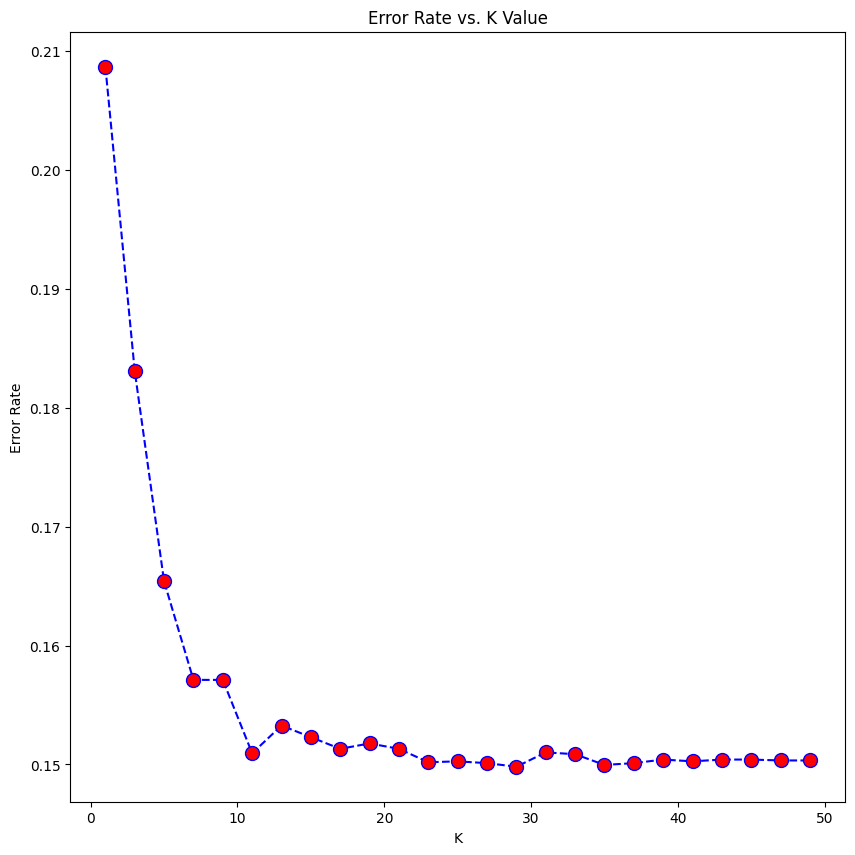

In [24]:
#Choix du k optimal
error_rate = []
k_values = list(filter(lambda x: x % 2 == 1, range(0, 50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_encoded, y_train)
    pred_i = knn.predict(X_test_encoded)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

#figure qui montre le k otpimal
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
# Créer une instance du model knn
knn = KNeighborsClassifier(n_neighbors = 29)

# Entraîner le modèle sur les données d'entraînement encodées
knn.fit(X_train_encoded, y_train)

print("Training score", knn.score(X_train_encoded, y_train))
print("Test score", knn.score(X_test_encoded, y_test))

Training score 0.8512227238525207
Test score 0.8501881113619263


In [30]:
# Prédiction sur les données d'entraînement et de test
y_train_pred_knn = knn.predict(X_train_encoded)
y_test_pred_knn = knn.predict(X_test_encoded)

# Matrice de confusion pour les données d'entraînement
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
print("Matrice de confusion (Training Data):")
print(conf_matrix_train_knn)

# Matrice de confusion pour les données de test
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)
print("\nMatrice de confusion (Test Data):")
print(conf_matrix_test_knn)

Matrice de confusion (Training Data):
[[44883   311]
 [ 7598   368]]

Matrice de confusion (Test Data):
[[11200    99]
 [ 1892    99]]


In [31]:
TP_knn = conf_matrix_test_knn[0, 0]
FP_knn = conf_matrix_test_knn[0, 1]
FN_knn = conf_matrix_test_knn[1, 0]
TN_knn = conf_matrix_test_knn[1, 1]

sensibilite_knn = round((TP_knn / (TP_knn + FN_knn)),2)*100
specificite_knn = round((TN_knn / (TN_knn + FP_knn)),2)*100
taux_erreur_alpha_knn = round((FP_knn / (FP_knn + TN_knn)),2)*100
taux_erreur_beta_knn = round((FN_knn / (FN_knn + TP_knn)),2)*100
taux_erreur_moyen_knn = round(((FP_knn + FN_knn) / (FP_knn + FN_knn + TP_knn + TN_knn)),2)*100

print("Sensibilité:", sensibilite_knn)
print("Spécificité:", specificite_knn)
print("Taux d'erreur alpha:", taux_erreur_alpha_knn)
print("Taux d'erreur beta:", taux_erreur_beta_knn)
print("Taux d'erreur moyen:", taux_erreur_moyen_knn)

Sensibilité: 86.0
Spécificité: 50.0
Taux d'erreur alpha: 50.0
Taux d'erreur beta: 14.000000000000002
Taux d'erreur moyen: 15.0
